**The Client:**
XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

**Project delivery:**
You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.
The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

**Data Set:**
You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.
Below are the list of datasets which are provided for the analysis:
- Cab_Data.csv – this file includes details of transaction for 2 cab companies
- Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details
- Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode
- City.csv – this file contains list of US cities, their population and number of cab users

**You should fully investigate and understand each data set:**
Review the Source Documentation
Understand the field names and data types
Identify relationships across the files
Field/feature transformations
Determine which files should be joined versus which ones should be appended
Create master data and explain the relationship
Identify and remove duplicates
Perform other analysis like NA value and outlier detection
 

Whatever and how many slides you prepare(Be creative and come up with meaningful insight):

The idea is to create a hypothesis, engage with the data, think critically, and use various analytical approaches to produce unique insights.

You are not limited to only utilizing the data you have been provided.

We encourage you to find third party data sets which correspond to the overall theme and geographical properties of the data provided.  For Example: you can leverage US holiday data/ weather data

Also, do research on overall cab industry in US and try to relate that with the trend in data

Analysis

Create multiple hypothesis and investigate:

You will need to generate 5-7 hypothesis initially to investigate as some will not prove what you are expecting.

For Example: “Is there any seasonality in number of customers using the cab service?”

Areas to investigate:

Which company has maximum cab users at a particular time period?
Does margin proportionally increase with increase in number of customers?
What are the attributes of these customer segments?
Although not required, we encourage you to document the process and findings

What is the business problem?
What are the properties of the data provided (data intake report)
What steps did you take in order to create an applicable data set?
How did you prepare and perform your analysis?
What type of analysis did you perform?
Why did you choose to use certain analytical techniques over others?
What were the results?
Prepare a presentation that summarizes your analysis and recommendations and identify which company is performing better and is a better investment opportunity for XYZ.

Deliverables of Week 2 are:

1. EDA Notebook (ipynb file)

2. Data Intake report (pdf file)

3. EDA recommendation and hypothesis results ( It should be in the ipynb notebook and you don't need not to present separate document) 

You can use either EDA or Modeling and EDA both to deliver the result.

Remember, there are no wrong answers as long as the data supports them.

Note: Sample presentation of previous batch intern, for your reference is added

## Importing Libraries

In [29]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)



## Reading Datasets

In [30]:
Cab_Data_url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
Cab_Data=pd.read_csv(Cab_Data_url, index_col=0)
Cab_Data.head()



,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
Transaction ID,,,,,,
10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [31]:
Cab_Data.shape

(359392, 6)

In [32]:
City_url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
City=pd.read_csv(City_url, index_col=0)
City.head()


,Population,Users
City,,
NEW YORK NY,"8,405,837","302,149"
CHICAGO IL,"1,955,130","164,468"
LOS ANGELES CA,"1,595,037","144,132"
MIAMI FL,"1,339,155","17,675"
SILICON VALLEY,"1,177,609","27,247"


In [33]:
City.shape

(20, 2)

In [34]:
Customer_ID_url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
Customer_ID=pd.read_csv(Customer_ID_url, index_col=0)
Customer_ID.head()


,Gender,Age,Income (USD/Month)
Customer ID,,,
29290,Male,28,10813
27703,Male,27,9237
28712,Male,53,11242
28020,Male,23,23327
27182,Male,33,8536


In [35]:
Customer_ID.shape

(49171, 3)

In [36]:
Transaction_ID_url='https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
Transaction_ID=pd.read_csv(Transaction_ID_url, index_col=0)
Transaction_ID.head()


,Customer ID,Payment_Mode
Transaction ID,,
10000011,29290,Card
10000012,27703,Card
10000013,28712,Cash
10000014,28020,Cash
10000015,27182,Card


In [37]:
Transaction_ID.shape

(440098, 2)

## Merging Datasets

**1st** Merge Cab_Data with Transaction_ID based on 'Transaction ID' column

In [38]:
# First of all I need to make 'Transaction ID' normal column by reset index
Transaction_ID=Transaction_ID.reset_index()
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [39]:
master_dataset = pd.merge(Cab_Data, Transaction_ID, on='Transaction ID', how='left')
master_dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card
...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card


In [40]:
# Just to check if every thing is okay
print(len(master_dataset)==len(Cab_Data))

True


**2nd** Merge master_dataset with Customer_ID based on 'Customer ID' column

In [41]:
master_dataset = pd.merge(master_dataset, Customer_ID, on='Customer ID', how='left')
master_dataset

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


**I will not merge** master_dataset with City so that each row in master_dataset indecates one ride info

## Rrenaming Columns

In [42]:
# not necessary step, just for convenience!
master_dataset.columns = master_dataset.columns.str.replace(' ','_')
master_dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423


## Understanding Dataset

In [43]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  int64  
 1   Date_of_Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM_Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost_of_Trip        359392 non-null  float64
 7   Customer_ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income_(USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 32.9+ MB


In [44]:
# change Transaction_ID and Customer_ID data types from int to str
master_dataset=master_dataset.astype({'Transaction_ID':str, 'Customer_ID':str})

master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction_ID      359392 non-null  object 
 1   Date_of_Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM_Travelled        359392 non-null  float64
 5   Price_Charged       359392 non-null  float64
 6   Cost_of_Trip        359392 non-null  float64
 7   Customer_ID         359392 non-null  object 
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income_(USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 32.9+ MB


In [45]:
master_dataset.describe()

,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Age,Income_(USD/Month)
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,42964.067998,22.567254,423.443311,286.190113,35.336705,15048.822937
std,307.467197,12.233526,274.378911,157.993661,12.594234,7969.409482
min,42371.000000,1.900000,15.600000,19.000000,18.000000,2000.000000
25%,42697.000000,12.000000,206.437500,151.200000,25.000000,8424.000000
50%,42988.000000,22.440000,386.360000,282.480000,33.000000,14685.000000
75%,43232.000000,32.960000,583.660000,413.683200,42.000000,21035.000000
max,43465.000000,48.000000,2048.030000,691.200000,65.000000,35000.000000


In [46]:
master_dataset.describe(include='O')

,Transaction_ID,Company,City,Customer_ID,Payment_Mode,Gender
count,359392,359392,359392,359392,359392,359392
unique,359392,2,19,46148,2,2
top,10000011,Yellow Cab,NEW YORK NY,494,Card,Male
freq,1,274681,99885,54,215504,205912


In [47]:
master_dataset.isnull().sum()

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [48]:
master_dataset.duplicated().sum()

0

currently in master_dataset ther are **12 featurs** for each ride **"359392 uniqe rides"**

## Generating New Featurs

### Profit

In [49]:
master_dataset['Profit'] = master_dataset.Price_Charged - master_dataset.Cost_of_Trip
master_dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,57.3150
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,23.6660
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,25.7980
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,16.8440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,5.8800
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,6.9020
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,87.4200
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,32.1420


### Profit rate

In [50]:
master_dataset['Profit_rate']=(master_dataset.Profit/master_dataset.Price_Charged)*100
master_dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Profit,Profit_rate
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,57.3150,15.450869
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,23.6660,6.601026
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680,22.019169
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,25.7980,6.835718
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,16.8440,14.695516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,5.8800,8.492201
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,6.9020,6.067692
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,87.4200,20.001373
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,32.1420,21.986456


### Age categories

In [51]:
max_age=master_dataset.Age.max()
min_age=master_dataset.Age.min()
age_catg_width=round((max_age-min_age)/3.0)
print('Max Age =', max_age, '\nmin Age =', min_age, '\nEach catg width =', age_catg_width)

Max Age = 65 
min Age = 18 
Each catg width = 16


In [52]:
bin_1=min_age+age_catg_width
bin_2= min_age+(2*age_catg_width)

master_dataset['Age_catg']=pd.cut(master_dataset['Age'], 
      bins=[min_age-1, bin_1, bin_2, max_age],
      labels=[str(min_age)+'_'+str(bin_1), str(bin_1)+'_'+str(bin_2), str(bin_2)+'_'+str(max_age)]
      )

master_dataset

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income_(USD/Month),Profit,Profit_rate,Age_catg
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,57.3150,15.450869,18_34
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,23.6660,6.601026,18_34
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,28712,Cash,Male,53,11242,27.5680,22.019169,50_65
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,28020,Cash,Male,23,23327,25.7980,6.835718,18_34
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,27182,Card,Male,33,8536,16.8440,14.695516,18_34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,52392,Cash,Male,24,15651,5.8800,8.492201,18_34
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,53286,Cash,Male,32,6528,6.9020,6.067692,18_34
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,52265,Cash,Male,56,7966,87.4200,20.001373,50_65
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,52175,Card,Male,32,6423,32.1420,21.986456,18_34


### Income categories

In [53]:
max_incom=master_dataset['Income_(USD/Month)'].max()
min_incom=master_dataset['Income_(USD/Month)'].min()
incom_catg_width=(max_incom-min_incom)/3.0
print('Max income =', max_incom, '\nmin income =', min_incom, '\nEach catg width =', incom_catg_width)

Max income = 35000 
min income = 2000 
Each catg width = 11000.0


In [54]:
master_dataset['Incom_catg']=pd.cut(master_dataset['Income_(USD/Month)'], 
      bins=[min_incom-1, min_incom+incom_catg_width, min_incom+(2*incom_catg_width), max_incom],
      labels=['Low incom', 'Avg incom', 'High incom']
      )
master_dataset.loc('Age'==34)


In [55]:
master_dataset.isnull().sum()

Transaction_ID        0
Date_of_Travel        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Customer_ID           0
Payment_Mode          0
Gender                0
Age                   0
Income_(USD/Month)    0
Profit                0
Profit_rate           0
Age_catg              0
Incom_catg            0
dtype: int64

In [56]:
master_dataset.shape

(359392, 16)

Currently in master_dataset ther are **16 featurs** for each ride **"359392 uniqe rides"**

## Assuming Hypotheses

### Number Of Rides For Each Company/City

Is ther significant deference between number of rides of each company among deferent cities?

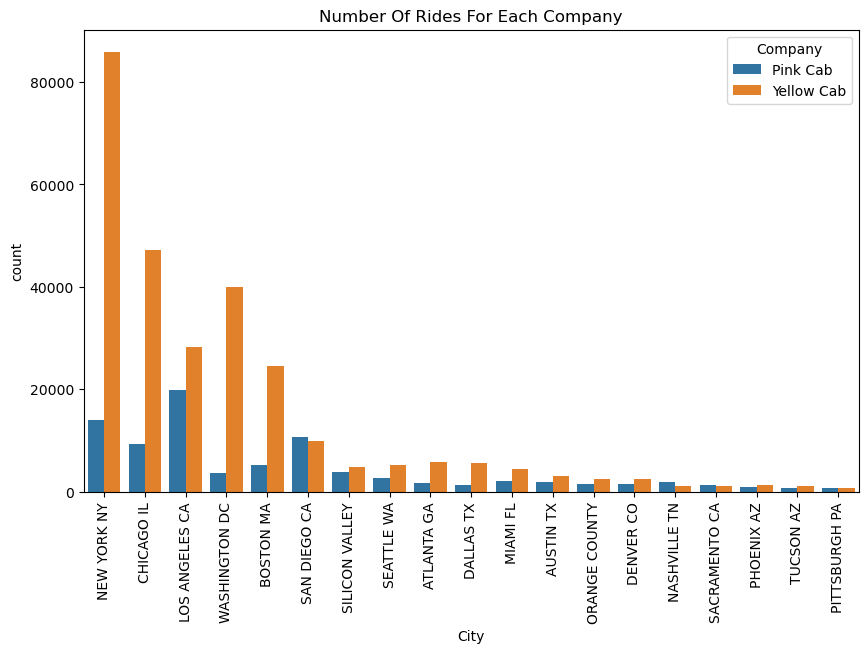

In [57]:
ax=sns.countplot(data=master_dataset, x=master_dataset.City, hue=master_dataset.Company, 
                 order=master_dataset.City.value_counts(ascending=False).index);

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

ax.set_title("Number Of Rides For Each Company");

The chart shows that Yellow Cab company have higher number of rides in most cities

### Total Profit For Each Company

Is ther significant deference company's profits?

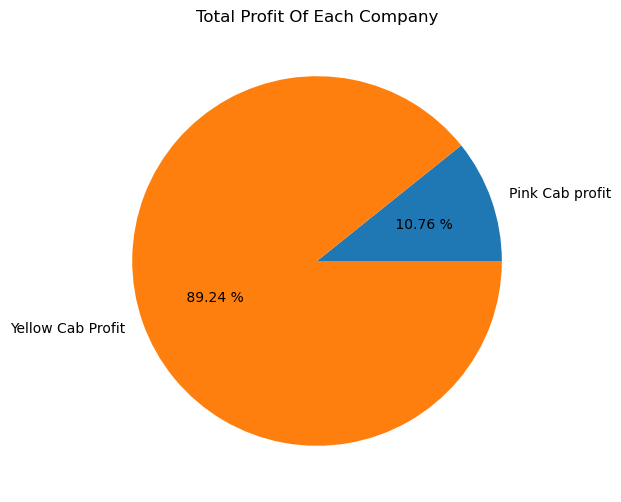

In [58]:
pink_cab_profit=master_dataset.query("Company=='Pink Cab'")['Profit'].sum()

yellow_cab_profit=master_dataset.query("Company=='Yellow Cab'")['Profit'].sum()

y=np.array([pink_cab_profit, yellow_cab_profit])

plt.pie(y, labels=['Pink Cab profit', 'Yellow Cab Profit'], autopct='% 1.2f %%');
plt.title("Total Profit Of Each Company");

The chart shows that Yellow Cab company makes almost 9 times more profit than Pinc Cab company.

### Avrge Profit Rate Of Each Company

Is there a significant deference between profit avrge of each company among deferent cities?

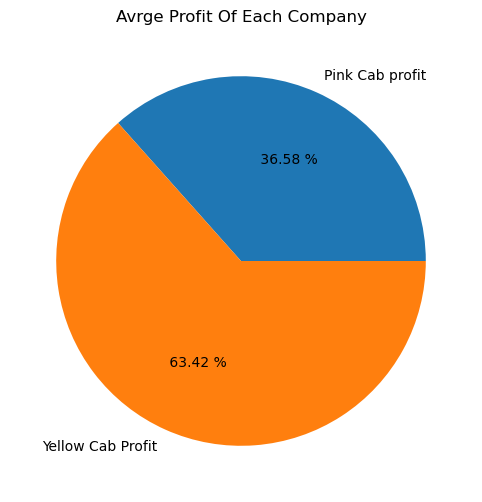

In [59]:
pink_cab_profit=master_dataset.query("Company=='Pink Cab'")['Profit_rate'].mean()

yellow_cab_profit=master_dataset.query("Company=='Yellow Cab'")['Profit_rate'].mean()

y=np.array([pink_cab_profit, yellow_cab_profit])

plt.pie(y, labels=['Pink Cab profit', 'Yellow Cab Profit'], autopct='% 1.2f %%');
plt.title("Avrge Profit Of Each Company");

Yellow Cab company's profit avrge is 2 times that Pinc Cab.

### Number Of Users For Each Company/City

Are there different preferences in different cities?

In [60]:
users_set=master_dataset[['Customer_ID', 'Gender', 'Age_catg', 'Incom_catg', 'Company', 'City']]
users_set.duplicated().sum()


287166

In [61]:
users_set=users_set.drop_duplicates()
users_set.duplicated().sum()

0

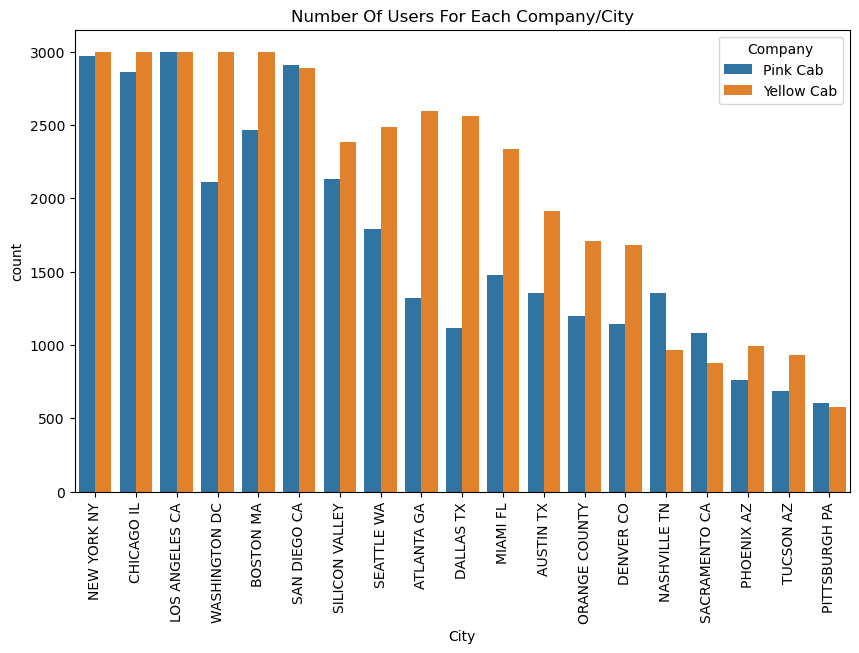

In [62]:
ax=sns.countplot(data=users_set, x=users_set.City, hue=users_set.Company,
                 order=master_dataset.City.value_counts().index);

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
ax.set_title("Number Of Users For Each Company/City");

Most users in most cities prefer Yellow Cab company

### Total Number Of Users For Each Company

Is ther a significant deference between number of users of each company?

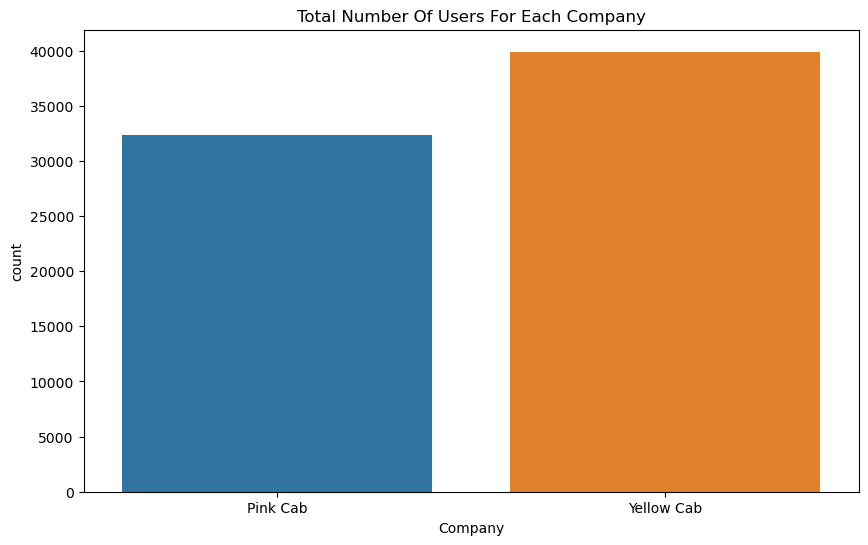

In [63]:
ax=sns.countplot(data=users_set, x=users_set.Company)
ax.set_title("Total Number Of Users For Each Company");

Total number of Yellow Cab company users is more than Total number of Pink Cab company users.m

### Users Gender For Each Company

Are there different preferences for males and females?

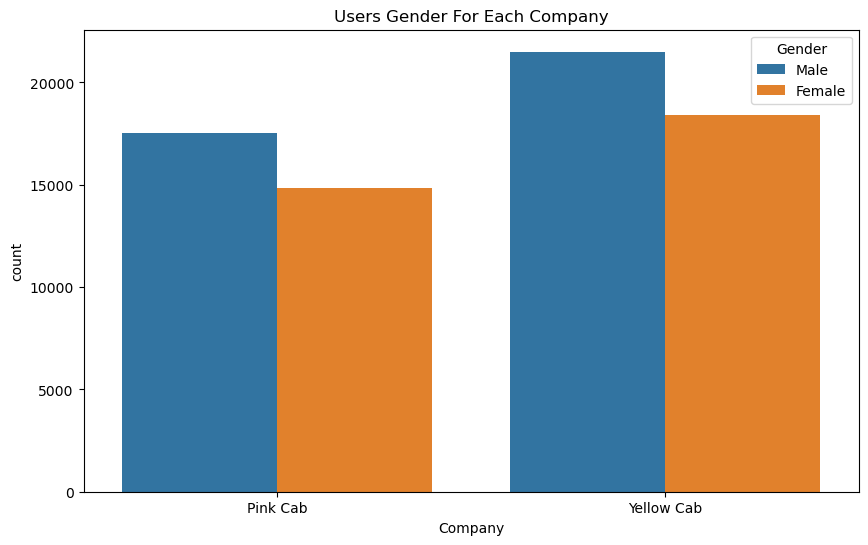

In [64]:
ax=sns.countplot(data=users_set, hue=users_set.Gender, x=users_set.Company);
ax.set_title("Users Gender For Each Company");

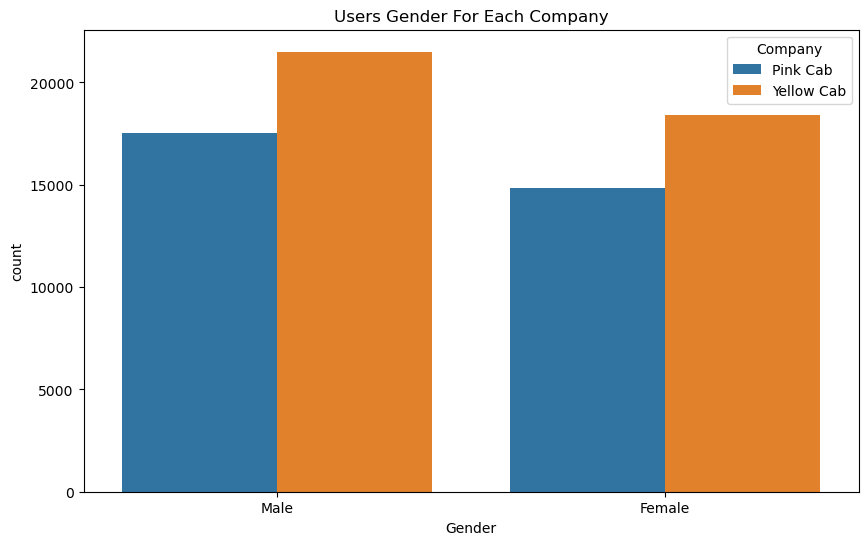

In [65]:
ax=sns.countplot(data=users_set, x=users_set.Gender, hue=users_set.Company);
ax.set_title("Users Gender For Each Company");

No, The ratio of males and females is similar in both companies.

### Users Age For Each Company

Are there different preferences for different age groups?

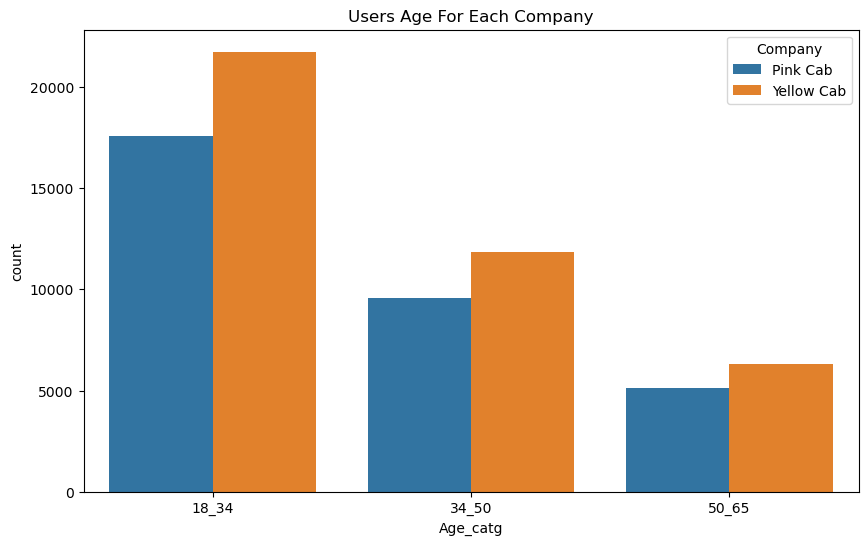

In [66]:
ax=sns.countplot(data=users_set, x=users_set.Age_catg, hue=users_set.Company);
ax.set_title("Users Age For Each Company");

Yellow Cab company have the majority of users among all age groups.

### Users Income For Each Company

Do customer prefernces differ based on income differences?

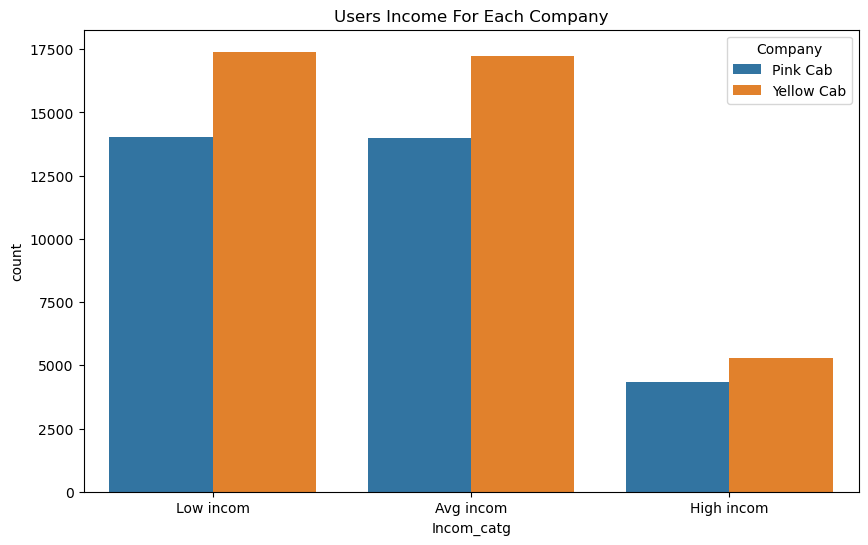

In [67]:
ax=sns.countplot(data=users_set, x=users_set['Incom_catg'], hue=users_set.Company);
ax.set_title("Users Income For Each Company");

No, the Yellow Cab Company is the preferred choice for people across different income groups.

### Freaquent Castomer For Each Campany

Do customers tend to repeat their experiences? If so, which company has the highest rate of repeat customers?

In [68]:
rides_count=master_dataset.groupby(['Customer_ID','Company'], sort=False)['Transaction_ID'].count().to_frame().reset_index()
rides_count=rides_count.rename(columns={'Transaction_ID':'Rides_Count'})
rides_count.columns

Index(['Customer_ID', 'Company', 'Rides_Count'], dtype='object')

In [69]:
rides_count.shape

# group by 'Customer_ID' = (46148, 2)
# group by ['Customer_ID','Company'] = (72226, 3)

(72226, 3)

In this particular case when I grouped the data by Customer_ID I got ~46K rows, while when I grouped by Customer_ID and Company I got ~72K rows. Which means that lots of users 
- either they are useing the two companys simultaneosly
- or they used to use one of the companys then decided to use the other one.

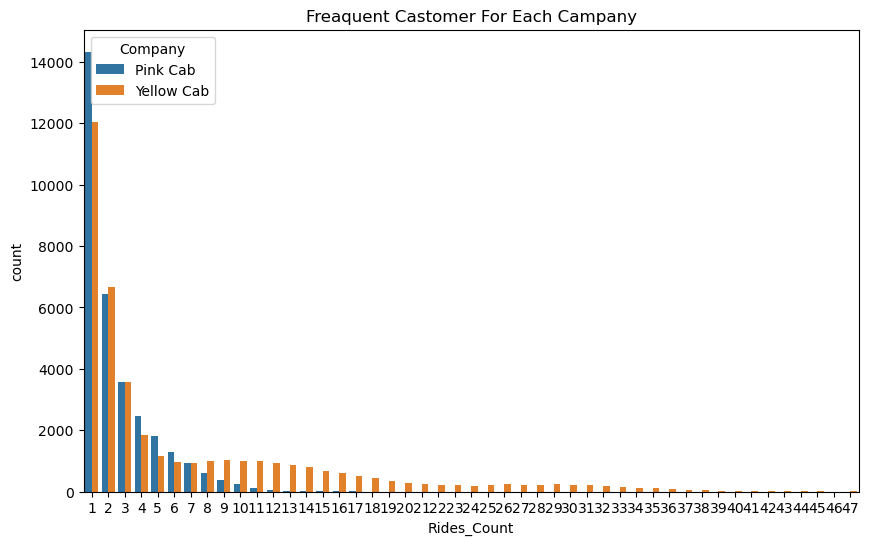

In [70]:
ax=sns.countplot(data=rides_count, x='Rides_Count', hue=rides_count.Company);
ax.set_title("Freaquent Castomer For Each Campany");

In [71]:
max_rides=rides_count.Rides_Count.max()
min_rides=rides_count.Rides_Count.min()
rides_catg_width=round((max_rides-min_rides)/5.0)
print('Max rides =', max_rides, '\nMin rides =', min_rides, '\nEach catg width =', rides_catg_width)

Max rides = 47 
Min rides = 1 
Each catg width = 9


In [72]:
# catg_n=[start, end]
bin_1=min_rides+rides_catg_width
bin_2= min_rides+(2*rides_catg_width)
bin_3= min_rides+(3*rides_catg_width)
bin_4= min_rides+(4*rides_catg_width)

rides_count['Rides_catg']=pd.cut(rides_count['Rides_Count'], 
      bins=[min_rides, bin_1, bin_2, bin_3, bin_4, max_rides],
      labels=[str(min_rides+1)+'_'+str(bin_1)+' rides', str(bin_1+1)+'_'+str(bin_2)+' rides', 
              str(bin_2+1)+'_'+str(bin_3)+' rides', str(bin_3+1)+'_'+str(bin_4)+' rides',
              str(bin_4+1)+'_'+str(max_rides)+' rides']
      )

rides_count

,Customer_ID,Company,Rides_Count,Rides_catg
0,29290,Pink Cab,1,NaN
1,27703,Pink Cab,2,2_10 rides
2,28712,Pink Cab,1,NaN
3,28020,Pink Cab,3,2_10 rides
4,27182,Pink Cab,1,NaN
...,...,...,...,...
72221,41414,Yellow Cab,1,NaN
72222,41677,Yellow Cab,1,NaN
72223,41155,Yellow Cab,1,NaN
72224,40467,Yellow Cab,1,NaN


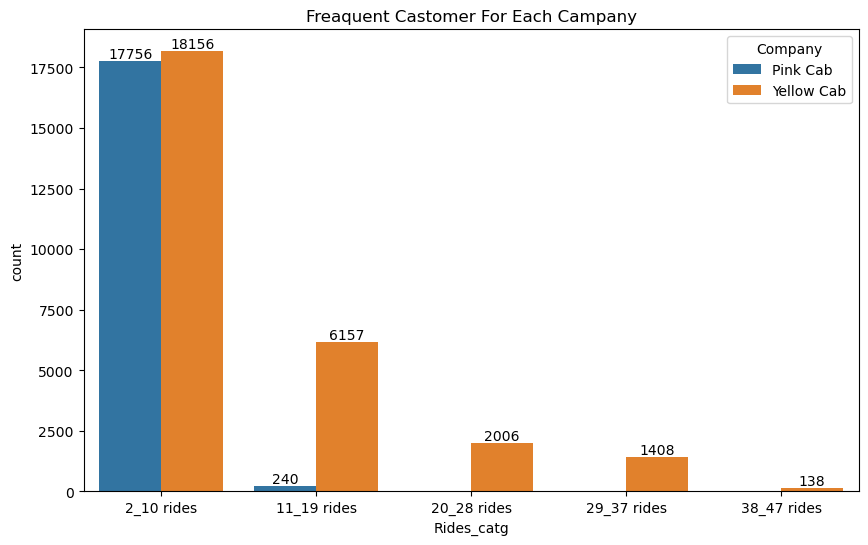

In [73]:
ax=sns.countplot(data=rides_count, x='Rides_catg', hue=rides_count.Company);

for i in ax.containers:
    ax.bar_label(i,)

# abs_values = rides_count['Rides_catg'].value_counts(ascending=False).values

# ax.bar_label(container=ax.containers[0], labels=abs_values)



ax.set_title("Freaquent Castomer For Each Campany");

A large number of users used the service once, but it seems that yellow company's users are more likely to repeat their experience.